In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn
import os

# Set wd

In [21]:
os.chdir("/groups/gerlich/experiments/Experiments_004600/004619/Results/")

# Load in data

In [22]:
data = pd.read_csv("Timelapse.csv", low_memory=False)

dataF = data.loc[~data["Class"].isin(["Artefacts", "Unclassified"]), :]

# Assign dead based on Topro

In [23]:
dead = dataF["Intensity2"] > 40
dataF.loc[:, "dead"] = dead

# Calculate averages for different timepoints and conditions

In [24]:
groupedC = dataF.groupby(["GeneSymbol", "TimeIndex", "Site", "Well"]).agg(lambda x: np.mean(x) * 100)
indexFrameC = groupedC.index.to_frame()
indexFrameC.index = range(len(indexFrameC))
indexFrameC.loc[:, "dead"] = list(groupedC["dead"])

In [25]:
time = 12

In [26]:
conditions = ["DMSO control",
            "2 mM 4TT",
            "4 mM 4TT",
            "6 mM 4TT",
            "8 mM 4TT",
            "10 mM 4TT",
            "50uM Etoposide"]

In [27]:
indexFrameC.loc[:, "alive"] = 100 - indexFrameC["dead"]

In [28]:
subFrame = indexFrameC.loc[indexFrameC["GeneSymbol"].isin(conditions)
                           & (indexFrameC.TimeIndex == time), :]

In [29]:
averageFrame = subFrame.groupby("GeneSymbol").mean().reset_index()

In [68]:
matplotlib.rcParams.update({"pdf.fonttype": 42})

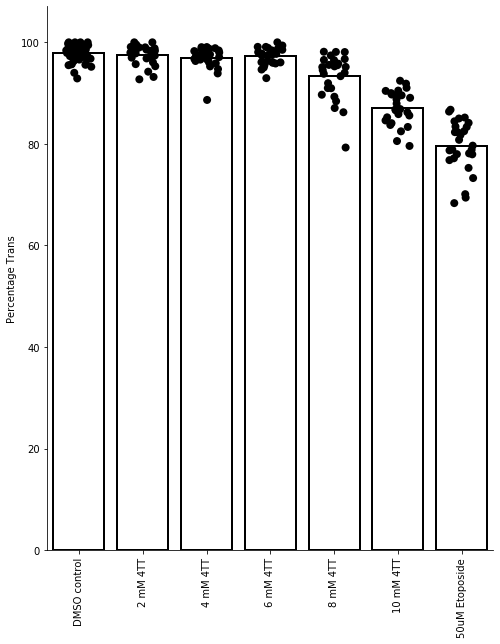

In [69]:
f, ax = plt.subplots()
sbn.barplot(x="GeneSymbol", y="alive", data=averageFrame, ax=ax, color="black",facecolor=(1, 1, 1, 0) , linewidth=2,edgecolor="black",
            order=conditions)
sbn.stripplot(x="GeneSymbol", y="alive", data=subFrame, color="black", size=8, jitter=0.2, ax=ax,
              order=conditions)
ax.set_xlabel("")
ax.set_ylabel("Percentage Trans")
sbn.despine()
plt.xticks(*plt.xticks(), rotation=90)
sbn.despine()
f.set_size_inches(8, 10)
plt.show()

In [71]:
resultDir = "/groups/gerlich/experiments/Experiments_004600/004619/Results/"
f.savefig(os.path.join(resultDir, "Perc_alive_wPoints.png"))
f.savefig(os.path.join(resultDir, "Perc_alive_wPoints.pdf"))

In [26]:
from scipy.stats import ttest_ind

In [63]:
a = subFrame.loc[subFrame["GeneSymbol"] == "DMSO control", "alive"].values
b = subFrame.loc[subFrame["GeneSymbol"] == "50uM Etoposide", "alive"].values

In [64]:
s, p = ttest_ind(a, b)

In [65]:
p

1.0948800178204104e-38

# Replicate 2

In [4]:
data2 = pd.read_csv("/groups/gerlich/experiments/Experiments_004500/004591/Results/timelapse_48h/Timelapse.csv", low_memory=False)
data2F = data2.loc[~data2["Class"].isin(["Artefacts", "Unclassified"]), :]


In [5]:
dead = data2F["Intensity2"] > 40
data2F.loc[:, "dead"] = dead

# Calcualte averages

In [12]:
grouped2C = data2F.groupby(["GeneSymbol", "TimeIndex", "Site", "Well"]).agg(lambda x: np.mean(x) * 100)
indexFrameC2 = grouped2C.index.to_frame()
indexFrameC2.index = range(len(indexFrameC2))
indexFrameC2.loc[:, "dead"] = list(grouped2C["dead"])

In [13]:
time = 12

In [14]:
conditions = ["DMSO control",
            "2 mM 4TT",
            "4 mM 4TT",
            "6 mM 4TT",
            "8 mM 4TT",
            "10 mM 4TT",
            "50uM Etoposide"]

In [15]:
indexFrameC2.loc[:, "alive"] = 100 - indexFrameC2["dead"]

In [17]:
subFrame2 = indexFrameC2.loc[indexFrameC2["GeneSymbol"].isin(conditions)
                           & (indexFrameC2.TimeIndex == time), :]

In [18]:
averageFrame2 = subFrame2.groupby("GeneSymbol").mean().reset_index()

In [19]:
matplotlib.rcParams.update({"pdf.fonttype": 42})

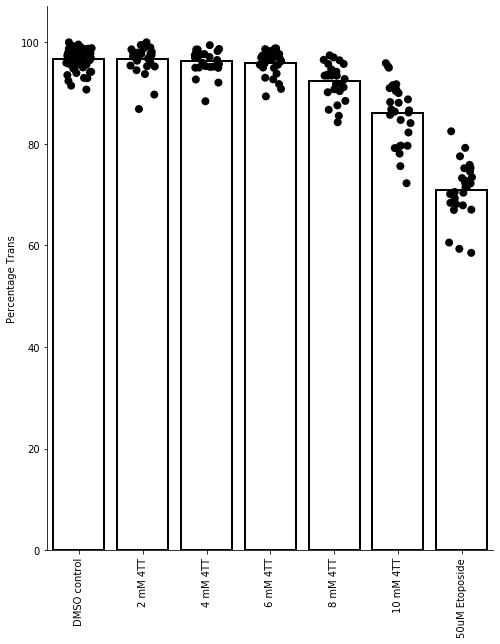

In [20]:
f, ax = plt.subplots()
sbn.barplot(x="GeneSymbol", y="alive", data=averageFrame2, ax=ax, color="black",facecolor=(1, 1, 1, 0) , linewidth=2,edgecolor="black",
            order=conditions)
sbn.stripplot(x="GeneSymbol", y="alive", data=subFrame2, color="black", size=8, jitter=0.2, ax=ax,
              order=conditions)
ax.set_xlabel("")
ax.set_ylabel("Percentage Trans")
sbn.despine()
plt.xticks(*plt.xticks(), rotation=90)
sbn.despine()
f.set_size_inches(8, 10)
plt.show()

# Plot the two replicates together

In [30]:
final = pd.concat((subFrame, subFrame2))
averageFrameFinal = final.groupby("GeneSymbol").mean().reset_index()

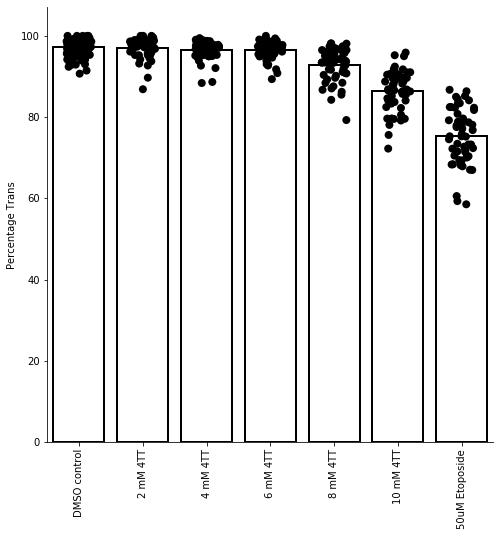

In [34]:
f, ax = plt.subplots()
sbn.barplot(x="GeneSymbol", y="alive", data=averageFrameFinal, ax=ax, color="black",facecolor=(1, 1, 1, 0) , linewidth=2,edgecolor="black",
            order=conditions)
sbn.stripplot(x="GeneSymbol", y="alive", data=final, color="black", size=8, jitter=0.2, ax=ax,
              order=conditions)
ax.set_xlabel("")
ax.set_ylabel("Percentage Trans")
sbn.despine()
plt.xticks(*plt.xticks(), rotation=90)
sbn.despine()
f.set_size_inches(8, 8)
plt.show()

In [35]:
resultDir = "/groups/gerlich/experiments/Experiments_004600/004619/Results/"
f.savefig(os.path.join(resultDir, "Perc_alive_wPoints_twoReps.png"))
f.savefig(os.path.join(resultDir, "Perc_alive_wPoints_twoReps.pdf"))